# TP 5

We consider a fluid flowing in one dimension, 

When the fluid deepness of a river or lagoon isn't too big we can consider the fluid is flowing in one dimension, the main direction ($x$ in a 1D model). Starting from the Navier-Stokes equation we can write a reduced model, called **Shallow Water** describing the fluid flow in terms of the fluid heigh $h$ and the flux $q$. The variable $q$ is $uh$ being $u$ the averaged velocity in the $y$ direction, $u(x,t) = { 1 \over h} \int_h u(x,y,t) dy$. 

We have then two variables, depending on time and space, $h = h(x,t)$; $q=q(x,t)$ and we can write the **differential conservation law** of mass and momentum as

$$\dfrac{\partial h}{\partial t} +  \dfrac{\partial q}{\partial x} = 0$$

$$\dfrac{\partial q}{\partial t} +  \partial \dfrac{ (q^2/h + 1/2 g h^2)}{\partial x} = S$$

where $g$ stand by gravity and $S$ is a source term which could model friction, Coriolis forces, surface tension, or the wind over the free surface $h$. The system can be expressed as

$$\dfrac{\partial U}{\partial t} +  \dfrac{\partial F(U)}{\partial x} = 0$$

with $F(U)$ the flux and $U = (h,q)^T$ the conserved variables, and $S=0$. 

## Work to do
For the TP 5 We want to compute the Shallow Water equation using a finite differences approach.

The configuration is the following, a recipient of length $L$ and a typical water height $h$ is perturbed (see Figures for two different initial conditions) and we want to analyze the fluid dynamics. 

<img src="sw2.png"  width="300" /> <img src="sw1.png"  width="300" />



**Physical Parameters**

- L = 10
- g = 10
- h = 1

**Numerical Parameters**
- dt = 0.01
- N = 100

**Boundary conditions** 
($x=0$ and $x=L$) 

- $q=0$
- ${ d h \over dx } = 0$

**Initial conditions**

- smooth $h_0(x) = 1. + 0.2 x $
- discontinous $h_0(x) = ( x < L./2 : 1.5 ? 1.0 )$

**Typical animation**

<img src="swAnimation.gif"  width="300" />

### A - Finite Differences

##### Q1 Lax–Wendroff method
Adapt the Lax–Wendroff method of TP 4 to the Shallow Water model.

#### Libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
%matplotlib inline

#### Parameters

In [24]:
# Numerical parameters

# number of points to define the mesh
N = 100

# length of the mesh
L = 10.

# Spatial grid
x = np.linspace(0, L, N)
dx = L/len(x)

# constant
g = 1.

#### Functions and Operators

In [25]:
import scipy.sparse as sp

def h0(x):            
    
    """  Smooth initial condition """
    
    h_0 = 1. + 0.2*x
    return h_0

def h0_d(x, L):    
    
    """  Discontinuous initial condition """
    
    h_0 = np.zeros((len(x)))
    h_0 = 1. + 0.5*(x<L/2)
    
    return h_0


def fill_F(U, g):
    
    """  Fill Flux vector of equations """
    
# U =[h, q]
    F = U.copy();
    F[:,0] = U[:,1]
    F[:,1] = U[:,1]**2/U[:,0] + (1/2)*g*U[:,0]**2
    
    return F


def BC(U):
    
    """  Boundary conditions """
    
    # Height - h
    U[0,0]  = U[1,0]
    U[-1,0] = U[-2,0]
    
    # Flux - q
    U[0,1]  = 0
    U[-1,1] = 0
    
    return

### Q1 - Lax–Wendroff method

In [26]:
## Algo

# Q1 Lax–Wendroff method
# Adapt the Lax–Wendroff method of TP 4 to the Shallow Water model.

def q_LW(x, dx, t0, T, dt, u_init, g):
    
    """  The Lax Wendroff method """
    
    u    = u_init.copy();
    unew = u_init.copy();
    
    h    = [u[:,0].copy()] # h variable
    q    = [u[:,1].copy()] # q variable
    
# Fill the algorithm    
    
    npas = int(T/dt)
    t    = t0
    i    = 0
    
    while i < npas:
        
        i += 1
        t += dt

        F  = fill_F(u, g)
        
        unew[1:-1,:] = u[1:-1,:] - .5*(dt/dx)*(F[2:,:] - F[:-2,:]) + .5*(dt/dx)**2*(u[2:,:] - 2*u[1:-1,:] + u[:-2,:])

        # Periodic BCs:
        BC(unew)

        if (i%100)==0:
            h.append(unew[:,0].copy()) # vector containing h(x,T) for each iteration
            q.append(unew[:,1].copy()) # vector containing h(x,T) for each iteration
        
        u = unew.copy()         # vector containing u(x,T)

    return (h, q, t) # h=concatenated heights  # q=concatenated fluxes

#### Computation

In [27]:
# Computation

# -------------------------------------------------

# CI 

# speed=0 --> q = 0 as u=hq. Reshape to fit with concatenation under the form u=[h,q]
q_0 = np.zeros((len(x)))
q_0 = q_0.reshape(-1, 1)

# height_ini
h_0 = h0_d(x,L)
h_0 = h_0.reshape(-1, 1)

# Concatenation
u_init = np.append(h_0, q_0, axis=1)

# -------------------------------------------------

t0 = 0.
T  = 10.

dt = 0.01

(h, q, t_final) = q_LW(x, dx, t0, T, dt, u_init, g)

print('We check for stability\n')
print('At final time t = {:.0f} s\n'.format(t_final))
print('H_final = \n{}'.format(h[-1]))
print('\nQ_final = q(x, {:.0f}) = \n{}'.format(t_final, q[-1]))

We check for stability

At final time t = 10 s

H_final = 
[0.99977935 0.99977935 1.00361903 1.00328841 1.00167937 1.00201434
 1.00047418 0.99983589 1.00019338 0.99969226 1.0011944  1.00366183
 1.00489272 1.00437169 1.0006385  0.99622916 0.99497766 0.99772419
 1.00339274 1.00829157 1.00921173 1.00596482 1.0002081  0.99491262
 0.99203752 0.9920469  0.99529723 1.00158935 1.00910165 1.01425818
 1.0145695  1.01131613 1.0086518  1.01329759 1.03964268 1.11472485
 1.25366959 1.39719628 1.42515604 1.30547428 1.14506799 1.04369739
 1.00985346 1.02083928 1.0781086  1.19877246 1.35647873 1.44766445
 1.39372516 1.25302389 1.13923963 1.10003078 1.13559801 1.24794669
 1.40170559 1.48475467 1.42201264 1.28741962 1.20142378 1.20539545
 1.28500626 1.40611406 1.49615075 1.4798522  1.37468895 1.28294609
 1.28376971 1.38250131 1.50012557 1.52747305 1.45831238 1.38424167
 1.37192937 1.41896208 1.48255326 1.52674011 1.52702043 1.4709692
 1.41139612 1.42489973 1.50764502 1.57111389 1.53993419 1.44626612
 1.4

#### Animation - Discontinuous IC

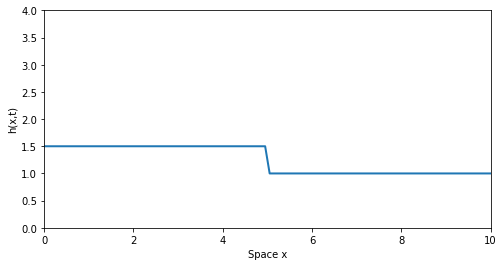

In [6]:
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

n = np.arange(0, np.shape(h)[0]) 

fig = plt.figure(figsize=(8,4))     # Create an empty figure
ax  = plt.axes()
line, = ax.plot([], [],linewidth=2) # Create an empty line plot

plt.axis((0, 10, 0, 4))             # Set the bounds of the plot
plt.xlabel('Space x')
plt.ylabel('h(x,t)')

def plot_q(n):
    line.set_data(x, h[n])  # Replace the line plot with the solution at time t
    
anim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution

#plt.show()
HTML(anim.to_jshtml())

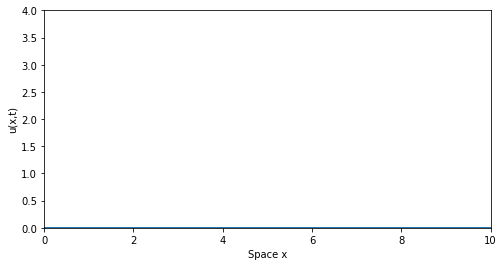

In [7]:
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

n = np.arange(0, np.shape(q)[0]) 

fig = plt.figure(figsize=(8,4))     # Create an empty figure
ax  = plt.axes()
line, = ax.plot([], [],linewidth=2) # Create an empty line plot

plt.axis((0, 10, 0, 4))             # Set the bounds of the plot
plt.xlabel('Space x')
plt.ylabel('u(x,t)')

def plot_q(n):
    line.set_data(x, q[n]/h[n])  # Replace the line plot with the solution at time t
    
anim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution

#plt.show()
HTML(anim.to_jshtml())

#### Balance sheet

One can see that the scheme is at first sight unstable. It indeed gets unstable for both initial IC, and so Lax-Wendroff scheme might not be adapted to shallow water model.

Let's look at MacCormak scheme on same differential system.

### Q2 - MacCormak method

Implement the MacCormack method.

This second-order finite difference method was introduced by Robert W. MacCormack in 1969. The MacCormack method is the simplest and elegant approach adapted to hyperbolic equations. This is a predictor-corrector approach, i.e. it predicts in the 1st step an intermediate solution $U_i^{*}$ which is then corrected in a 2nd step. 

The algorithm is

* predictor

$$U_i^{*} = U_i^n - {\Delta t \over \Delta x}  ( F_{i+1}^{n} - F_i^{n} )$$

* corrector

$$U_i^{n+1} = { 1 \over 2} (U_i^n + U_i^{*}) - { 1 \over 2}   {\Delta t \over \Delta x}  ( F_{i}^{*} - F_{i-1}^{*} )$$

The MacCormack algorithm does not introduce diffusive errors but it is known to be dispersive  (Gibbs phenomenon) in high gradient regions.

#### Data

In [8]:
# IC - smooth IC 

# speed=0 --> q = 0 as u=hq. Reshape to fit with concatenation under the form u=[h,q]
q_0 = np.zeros((len(x)))
q_0 = q_0.reshape(-1, 1)

# height_ini
h_0 = h0_d(x,L)
h_0 = h_0.reshape(-1, 1)

# Concatenation
u_init = np.append(h_0, q_0, axis=1)

# --------------------------------------------------------

# time data
t0 = 0.
T  = 10.

dt = 0.01

#### Operators

In [9]:
# Matrix/Operator version

import scipy.sparse as sp

# --------------------------------------------------------

def diverg_up_op(m):
    
    """ divergence operator """
    
    Div = sp.diags([-1, 1], [0, 1], (m, m)).toarray()
    
    Div[0,1]= 0
    Div[0,0] = Div[-1,-1] = 1
   
    return Div


def diverg_down_op(m):
    
    """ divergence operator """
    
    Div = sp.diags([-1, 1], [-1, 0], (m, m)).toarray()
    
    Div[-1,-2]= 1
    
    return Div

## Algo

def q_MC(x, dx, t0, T, dt, u_init, g):

    """  The MacCormak method """
    
    u      = u_init.copy();
    u_star = u_init.copy();
    unew   = u_init.copy();
    
    h      = [u[:,0].copy()] # h variable
    q      = [u[:,1].copy()] # q variable
    
    # -------------------------------------------
    
    Div_down = diverg_down_op(len(u[:,0]))
    Div_up   = diverg_up_op(len(u[:,0]))
    
    # -------------------------------------------
    
    npas = int(T/dt)
    t      = t0
    i      = 0
    
    while i < npas:
        
        i += 1
        t += dt

        # predictor solution
        F  = fill_F(u, g)
        u_star = u - (dt/dx)*Div_down@F
        
        # Periodic BCs:
        BC(u_star)
        
        # corrector solution
        F_star  = fill_F(u_star, g)
        unew = .5*(u+u_star) - .5*(dt/dx)*Div_up@F_star

        # Periodic BCs:
        BC(unew)

        if (i%100)==0:
            h.append(unew[:,0].copy()) # vector containing h(x,T) for each iteration
            q.append(unew[:,1].copy()) # vector containing h(x,T) for each iteration
        
        u = unew.copy()         # vector containing u(x,T)

    return (h, q, t)

(h, q, t_final) = q_MC(x, dx, t0, T, dt, u_init, g)

print('We check for stability\n')
print('At final time t = {:.0f} s\n'.format(t_final))
print('H_final = {} \n'.format(h[-1]))
print('Q_final = q(x, {:.0f}) = {}'.format(t_final, q[-1]))

We check for stability

At final time t = 10 s

H_final = [0.99581927 0.99581927 1.0039761  1.00430711 1.0002584  0.99949909
 0.99650414 0.99626393 0.99844514 0.99798366 0.99917053 1.00197194
 1.00375749 1.00381082 0.99890226 0.99191439 0.98912852 0.99305628
 1.00234466 1.01023572 1.01063127 1.00425087 0.99570443 0.9896823
 0.98735195 0.98783081 0.99147876 0.99882586 1.00813943 1.01478358
 1.01471167 1.00849578 1.00036034 0.99458802 0.99451959 1.00678554
 1.04624704 1.12890188 1.24027485 1.31854656 1.31231348 1.24085171
 1.16460912 1.12743044 1.14408327 1.20979851 1.2939431  1.34459706
 1.3327364  1.28086976 1.23528257 1.22772234 1.26329995 1.321565
 1.36577224 1.37046532 1.34379351 1.31604923 1.3121538  1.33638015
 1.37299016 1.39880015 1.40189615 1.39014005 1.3812152  1.38682675
 1.40537896 1.42576968 1.43752765 1.43903968 1.43703373 1.43920271
 1.448004   1.4600598  1.46992484 1.474777   1.47608914 1.47730772
 1.48089587 1.48677808 1.49234456 1.49497636 1.49479734 1.4940526
 1.49490

#### Animation - Smooth IC

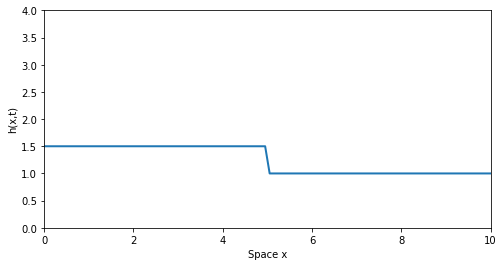

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

n = np.arange(0,np.shape(h)[0]) 

fig   = plt.figure(figsize=(8,4))      # Create an empty figure
ax    = plt.axes()
line, = ax.plot([], [],linewidth=2)  # Create an empty line plot

plt.xlabel('Space x')
plt.ylabel('h(x,t)')

plt.axis((0, 10, 0, 4))                 # Set the bounds of the plot

def plot_q(n):
    line.set_data(x, h[n])  # Replace the line plot with the solution at time t
    
anim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution

#plt.show()
HTML(anim.to_jshtml())

As expected the scheme presents dispersivity (vertical unstability).

Let's check convergence looking at time and space steps for both methods.

### Q3 Convergence and comparison

We want to study the convergence in space and in time of both methods. Using the smooth initial condition compare the final solution for $T=10$

1. For fixed $\Delta x$ varying $dt$
2. For fixed $dt$ varying $\Delta x$ 

#### 1 - Fixed $\Delta x$, varying dt

We first check where we have stability for both method before comparing them on valid range of time step.

In [11]:
# Numerical parameters

# number of points to define the mesh
N = 100

# length of the mesh
L = 10.

# Spatial grid
x = np.linspace(0, L, N)
dx = L/len(x) # fix value

# constant
g = 1.

In [12]:
## IC - Smooth IC 

# speed=0 --> q = 0 as u=hq. Reshape to fit with concatenation under the form u=[h,q]
q_0 = np.zeros((len(x)))
q_0 = q_0.reshape(-1, 1)

# height_ini
h_0 = h0(x) # smooth IC
h_0 = h_0.reshape(-1, 1)

# Concatenation
u_init = np.append(h_0, q_0, axis=1)

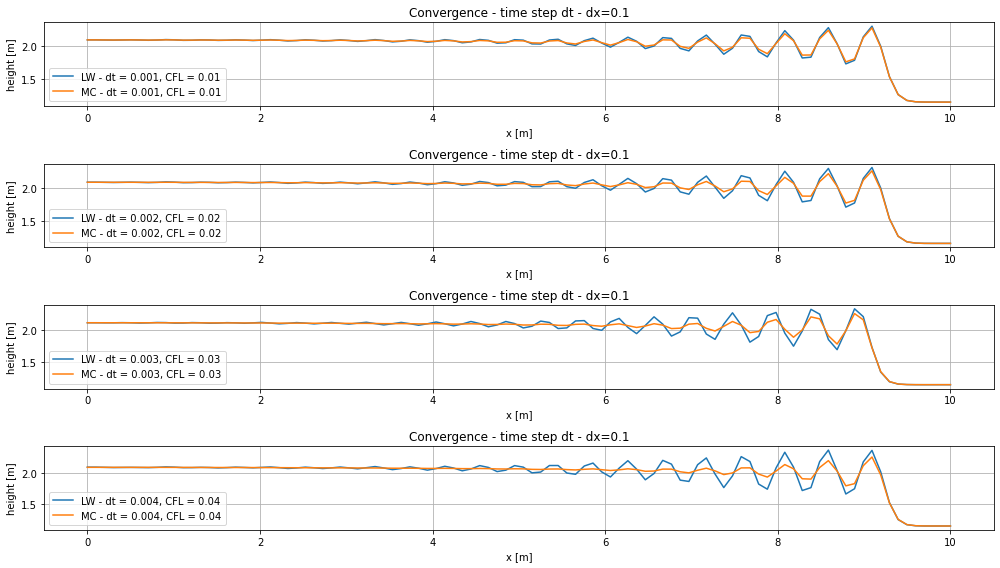

In [13]:
# Convergence dt

figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))

dx   = L/len(x)

# ---------------------------------------------------------------

N_dt = 5 # Number of dt to be tested
dt   = np.array([0.001*k for k in range(1, N_dt)]) # nu = cflnum so we might ensure cflnum <= 1

for i in range(np.size(axes,0)):

    # LW
        
    (Q, t_final, h_final) = q_LW(x, dx, t0, T, dt[i], u_init, g)    
    axes[i].plot(x, Q[-1], label=f'LW - dt = {dt[i]:.3f}, CFL = {dt[i]/dx:.2f}')

    axes[i].set_title(f'Convergence - time step dt - dx={dx}')
    axes[i].set_xlabel('x [m]')
    axes[i].set_ylabel("height [m]")
        
    axes[i].grid('True')
    axes[i].legend(loc=3)
        
    # -------------------------------------------------------------------------------
        
    # MC
        
    (Q, t_final, h_final) = q_MC(x, dx, t0, T, dt[i], u_init, g)    
    axes[i].plot(x, Q[-1], label=f'MC - dt = {dt[i]:.3f}, CFL = {dt[i]/dx:.2f}')

    axes[i].set_title(f'Convergence - time step dt - dx={dx}')
    axes[i].set_xlabel('x [m]')
    axes[i].set_ylabel("height [m]")
        
    axes[i].grid('True')
    axes[i].legend(loc=3)
        
plt.tight_layout()

Solution, when barely stable behaves similarly, even if LW presents more dispersivity.
MacComrak scheme being of an order similar in precision, 

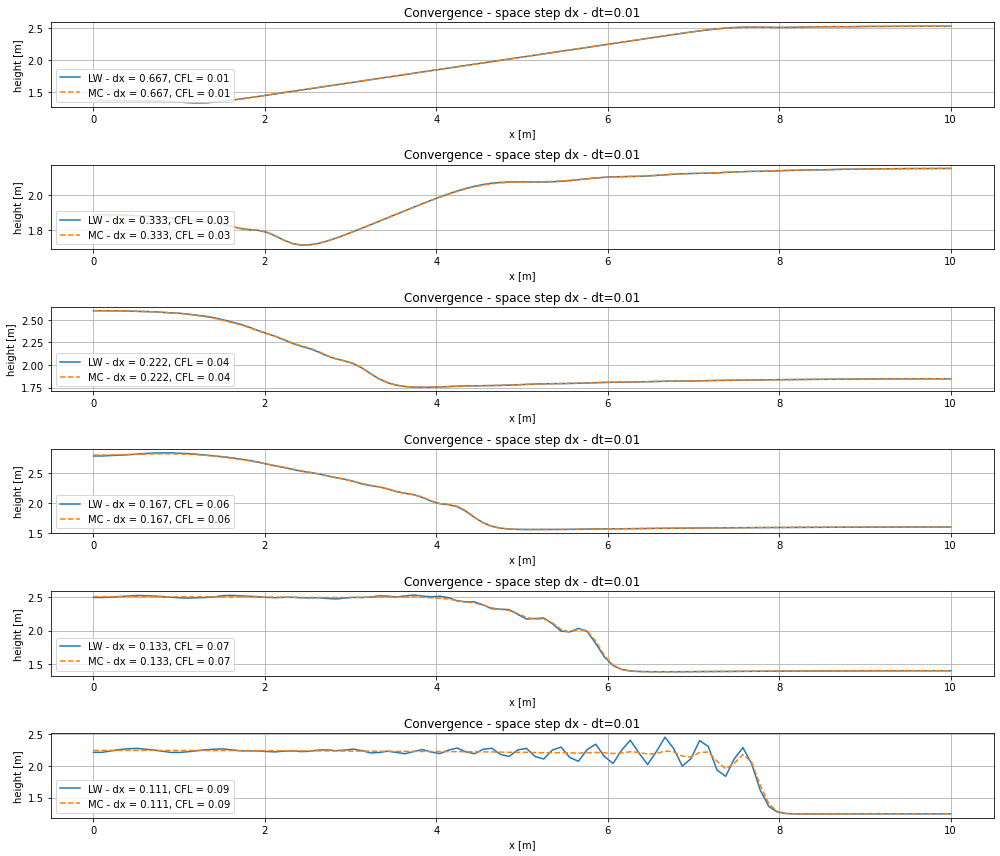

In [14]:
# Convergence dx

figure, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 12))

dt = 0.01

# ---------------------------------------------------------------

N_dx = 7 # Number of dt to be tested
CFL  = np.array([0.015*k for k in range(1, N_dx)]) # nu = cflnum so we might ensure cflnum <= 1

dx   = dt/CFL

for i in range(np.size(axes,0)):

        # LW
        
        (Q, t_final, h_final) = q_LW(x, dx[i], t0, T, dt, u_init, g)    
        axes[i].plot(x, Q[-1], label=f'LW - dx = {dx[i]:.3f}, CFL = {dt/dx[i]:.2f}')

        axes[i].set_title(f'Convergence - space step dx - dt={dt}')
        axes[i].set_xlabel('x [m]')
        axes[i].set_ylabel("height [m]")
        
        axes[i].grid('True')
        axes[i].legend(loc=3)
        
        # -------------------------------------------------------------------------------
        
        # MC
        
        (Q, t_final, h_final) = q_MC(x, dx[i], t0, T, dt, u_init, g)    
        axes[i].plot(x, Q[-1], '--', label=f'MC - dx = {dx[i]:.3f}, CFL = {dt/dx[i]:.2f}')

        axes[i].set_title(f'Convergence - space step dx - dt={dt}')
        axes[i].set_xlabel('x [m]')
        axes[i].set_ylabel("height [m]")
        
        axes[i].grid('True')
        axes[i].legend(loc=3)
        
plt.tight_layout()

While both methods converge towards the same solution for low CFL number, one sees that for $CFL \approx 0.1$, LW method becomes destrucitve.

To finish, MacCormak scheme is of higher order in terms of precision than Lax-Wendroff scheme, that is of order 2 in space and 3 in time.

Furthermore, both solution present irregularities and one must be within low CFL number range to get the solution at beginning of assignement.

#### Q4 - HLL Solver

The algorithm for the numerical flux is

$$
\mathbf{F}_{num}^{h l l}=\left\{\begin{array}{ccc}
\mathbf{F}_{L} & \text { if } & 0 \leq S_{L} \\
\frac{S_{R} \mathbf{F}_{L}-S_{L} \mathbf{F}_{R}+S_{L} S_{R}\left(\mathbf{U}_{R}-\mathbf{U}_{L}\right)}{S_{R}-S_{L}} & , \ \ \ \text { if } S_{L} \leq 0 \leq S_{R} \\
\mathbf{F}_{R} & \text { if } & 0 \geq S_{R}
\end{array}\right.
$$

1. Compute the Jacobian matrix $\partial_{U} F(U)$ and show that the eigenvalues are $S_{L/R} = u_{L/R} \pm \sqrt{g h_{L/R}}$

2. Implement the HLL Solver 

Obtain F(U) :
    
$$\dfrac{\partial h}{\partial t} +  \dfrac{\partial q}{\partial x} = 0$$

$$\dfrac{\partial q}{\partial t} +  \partial \dfrac{ (q^2/h + 1/2 g h^2)}{\partial x} = S$$

we deduce $F(u) = (uh ~~;~~ u^2 h + \dfrac{1}{2}gh^2)$ and so :

$\partial F(u) = np.array([
                          [      u,   h],
                          [u^2 +gh, 2uh] 
                                       ])$
                                       
To finish we are to compute eigen values at each iteration and deduce the flux from it. Note that as u = 0 initially, we will calculate $S_{L/R}$ from h.

##### Q5 Rusanov Solver 

A particular (and simplification) case of the HLL solver is proposed by Rusanov by setting only one velocity $S$ as the maximum of all interface velocities 

$S=max(SL(U_L),SR(U_L),SL(U_R),SR(U_R)$

The algorithm is

$$
\mathbf{F}_{num}=\frac{1}{2}\left(\mathbf{F}_{L}+\mathbf{F}_{R}\right)-\frac{1}{2} S \left(\mathbf{U}_{R}-\mathbf{U}_{L}\right)
$$

1. Implement the Rusanov Solver

##### Q6  Convergence and comparison

We want to study the convergence in space and in time of both methods. Using the smooth initial condition compare the final solution for $T=10$

1. For fixed $\Delta x$ varying $dt$
2. For fixed $dt$ varying $\Delta x$ 

#### Parameters

In [28]:
# Numerical parameters

# number of points to define the mesh
N = 100

# length of the mesh
L = 10.

# Spatial grid
x = np.linspace(0, L, N)
dx = L/len(x)

# constant
g = 1.

In [134]:
## Algo

# Q4 HLL solver
# Applly HLL solver to the Shallow Water model.

def q_HLL(x, dx, t0, T, dt, u_init, g):
    
    """  The HLL solver """
    
    u    = u_init.copy();
    unew = u_init.copy();
    
    h    = u[:,0].copy() # h variable
    q    = u[:,1].copy() # q variable
    
    # steps   
    npas = int(T/dt)
    t    = t0
    i    = 0
    
    while i < npas:
        
        i += 1
        t += dt

        F  = fill_F(u, g)
        
        for k in range(1, np.size(unew,0)-1):

            # Eigenvalues
            
            # speed at i+1/2 & i-1/2
            U_left  = (u[k:k+1,1]/u[k:k+1,0] + u[k-1:k,1]/u[k-1:k,0])/2
            U_right = (u[k+1:k+2,1]/u[k+1:k+2,0] + u[k:k+1,1]/u[k:k+1,0])/2

            # height at i+1/2 & i-1/2
            H_left  = (u[k:k+1,0] + u[k-1:k,0])/2
            H_right = (u[k+1:k+2,0] + u[k:k+1,0])/2
            
            # eigenvalues at i+1/2 & i-1/2
            S_left  = U_left  - (g*H_left)**(1/2)
            S_right = U_right + (g*H_right)**(1/2)
            
            # forces at i+1/2 & i-1/2
            F_left  = (F[k:k+1,:] + F[k-1:k,:])/2
            F_right = (F[k+1:k+2,:] + F[k:k+1,:])/2
            
            # HLL flux
            Flux_F = (S_right*F_left - S_left*F_right + S_left*S_right*(U_right-U_left)) / (S_right-S_left)
            
            if S_left>0:
                F[k,:] = F_left

            elif S_left<=0 and S_right>=0:
                F[k,:] = Flux_F
                
            elif S_right<0:
                F[k,:] = F_right
        
            else:
                1==0
        
        unew[1:-1,:] = u[1:-1,:] - .5*(dt/dx)*(F[2:,:] - F[:-2,:]) + .5*(dt/dx)**2*(u[2:,:] - 2*u[1:-1,:] + u[:-2,:])

        # Periodic BCs:
        BC(unew)

        if (i%100)==0:
            h = np.append(h, unew[:,0].copy()) # vector containing h(x,T) for each iteration
            q = np.append(q, unew[:,1].copy()) # vector containing h(x,T) for each iteration
        
        u = unew.copy()         # vector containing u(x,T)

    return (h, q, t) # h=concatenated heights  # q=concatenated fluxes

#### Computation

In [135]:
# Computation

# -------------------------------------------------

# CI 

# speed=0 --> q = 0 as u=hq. Reshape to fit with concatenation under the form u=[h,q]
q_0 = np.zeros((len(x)))
q_0 = q_0.reshape(-1, 1)

# height_ini
h_0 = h0_d(x,L)
h_0 = h_0.reshape(-1, 1)

# Concatenation
u_init = np.append(h_0, q_0, axis=1)

# -------------------------------------------------

t0 = 0.
T  = 10.

dt = 0.01

(h, q, t_final) = q_HLL(x, dx, t0, T, dt, u_init, g)


print('We check for stability\n')
print('At final time t = {:.0f} s\n'.format(t_final))
print('H_final = \n{}'.format(h[-1]))
print('\nQ_final = q(x, {:.0f}) = \n{}'.format(t_final, q[-1]))


<ipython-input-134-b50d46eb2dc7>:42: RuntimeWarning: invalid value encountered in sqrt
  S_right = U_right + (g*H_right)**(1/2)
<ipython-input-134-b50d46eb2dc7>:54: RuntimeWarning: invalid value encountered in greater_equal
  elif S_left<=0 and S_right>=0:
<ipython-input-134-b50d46eb2dc7>:57: RuntimeWarning: invalid value encountered in less
  elif S_right<0:
<ipython-input-134-b50d46eb2dc7>:41: RuntimeWarning: invalid value encountered in sqrt
  S_left  = U_left  - (g*H_left)**(1/2)
<ipython-input-134-b50d46eb2dc7>:51: RuntimeWarning: invalid value encountered in greater
  if S_left>0:
<ipython-input-134-b50d46eb2dc7>:54: RuntimeWarning: invalid value encountered in less_equal
  elif S_left<=0 and S_right>=0:
<ipython-input-25-fa95f557582a>:27: RuntimeWarning: overflow encountered in square
  F[:,1] = U[:,1]**2/U[:,0] + (1/2)*g*U[:,0]**2
<ipython-input-134-b50d46eb2dc7>:46: RuntimeWarning: invalid value encountered in add
  F_right = (F[k+1:k+2,:] + F[k:k+1,:])/2
<ipython-input-134-b5

We check for stability

At final time t = 10 s

H_final = 
nan

Q_final = q(x, 10) = 
0.0


#### Animation - Discontinuous IC

KeyboardInterrupt: 

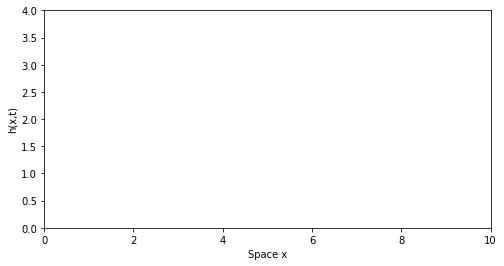

In [130]:
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

n = np.arange(0, np.shape(h)[0]) 

fig = plt.figure(figsize=(8,4))     # Create an empty figure
ax  = plt.axes()
line, = ax.plot([], [],linewidth=2) # Create an empty line plot

plt.axis((0, 10, 0, 4))             # Set the bounds of the plot
plt.xlabel('Space x')
plt.ylabel('h(x,t)')

def plot_q(n):
    line.set_data(x, h[n])  # Replace the line plot with the solution at time t
    
anim=animation.FuncAnimation(fig, plot_q, frames=n)  # Animate the solution

#plt.show()
HTML(anim.to_jshtml())